# Data 602 - Homework 2: Clustering

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import Utils as u
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('max_colwidth',None)

C:\Users\barker.FRENCH\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


## Table of Contents

<ol><li>Abstract</li>
    <li>Business Problem</li>
    <li>Data Dictionary</li>
    <li>Understanding/Visualizing the Data</li>
    <li>Feature Engineering</li>
    <li>Modeling</li>
    <li>Model Evaluation & Selection</li>
    <li>Conclusions</li>

## 1. Abstract

## 2. Business Problem
<p>  If you're a high school student interested in going to college, how do you choose which school your going to go to?  Students seeking a degree from a post-secondary educational instuition face a choice among thousands of potential schools.  These schools range in cost from tens of thousands of dollars to hundreds of thousands of dollars.  Some specialize in art, others focus on the trades, while some focus on technical areas.  And, if you're seeking a diverse college experience, how do you make sure that you don't end up in a place that is caters to mostly white, rich kids?  This project seeks to aid students making the difficult decision of where to go to college by grouping like schools together.  In theory if the groups are good enough, a student could research and visit a group of schools, pick their favorite and then refer back to the models output to find similar schools.</p>

<p>  The corresponding machine learning question is how do you cluster a set of thousands of post-secondary educational instituions to help students focus their time on the cluster of educational institutions that meet their needs and allow them to quickly discount the majority of other schools.</p>

## 3. Data Dictionary
<ul><li><b>Source:</b> Data World<\li>
    <li><b>Hyperlink:</b> https://data.world/exercises/cluster-analysis-exercise-2/workspace/file?filename=CollegeScorecard.csv</li>
    <li><b>Author/Reason for Creation:</b> Data World created this data set "as a resource for instructors to integrate into coursework or for individuals looking for practice opportunities."<\li>
    <li><b>Size:</b>  7804x1725 -- 7804 schools with 1725 Data Elements<\li>
    <li><b>Suitability:</b> The data set is a good source for solving this problem because it has a comprehensive list of post-secondary schools and a fairly large set of real number data elements that can be used to group the schools.<\li>
        <li><b>Data Dictionary:</b> The Data Dictionary for the data elements used in the project can be found at the end of the Exploratory Data Analysis workbook.</li>

## 4. Understanding/Vizualizing/Preparing the Data

In [2]:
df_original_data = pd.read_csv('CollegeScorecard.csv',delimiter=',',low_memory=False)
df_data_dict = pd.read_csv('CollegeScorecardDataDictionary-09-12-2015.csv')

### 4.1. Data Types
<p>The first characteristic of the data set that jumped out was the number of data elements.  1,725 Data Elements are mind boggling.  The question was where to begin.  Since clustering does not work with categorical data, since some object columns contained mixed data types, and since some integer data was categorical, all non-float data elements were removed. Note that the data dictionary reported 1720 data elements, while the data has 1725.  The data dictionary was used as the authoritative source and the additional data elements were removed.  The result was 1196 float type data elements.</p>

In [3]:
df_float = u.remove_non_float_dtypes(df_original_data,df_data_dict)

Original Shape: (7804, 1725) 

Original data type distribution:
 float      1200
integer     514
string        6
Name: API data type, dtype: int64

Updated Shape: (7804, 1201)


### 4.2. Null Values

<p>There were a large number of data elements of type float that had a signficant number of missing values in the form of NAN's.  The choice was between either dropping schools that did not have a value for a given data element or dropping the data element itself and retaining the schools.  I addressed this issue several ways.</p>

<p>First, data elements that had more than 10% of their values as NAN were removed because each school should have a value for each data element to be properly grouped.  The result was a reduction in data elements from 1196 to 80.  Next a decision had to be made to exclude additional data elements or to exclude schools that contained NAN values in the remaining columns.  Of the 7,804 schools in the data set, 6,437 schools had zero NAN's in the remaining columns.  Further the schools that were removed did not appear to be commonly known schools.  So, the schools with NAN values were dropped.  The result was a data set with no NAN's.</p>

In [4]:
df_float_no_nan = u.remove_data_elements_with_greater_than_10pct_nan(df_float)

Updated Shape: (6437, 85)


### 4.3 Removed Predominately Certificate/Associates Degree Bestowing Schools

<p> The problem addressed by this project is helping degree seeking students identify schools to apply to.  Therefore schools predominately providing either certificates or associate degrees were removed.  During the exploratory data analysis I tested changing the order of removing the non-degree bestowing schools vs. removing the nan values.  My thought was that nan values could predominate in schools that were removed leading to an unnecessary loss of data elements.  However, I found that this was not the case.</p>

In [5]:
df_float_no_nan.columns.values

array(['UNITID', 'OPEID', 'opeid6', 'INSTNM', 'PREDDEG',
       'APPL_SCH_PCT_GE2', 'APPL_SCH_PCT_GE3', 'APPL_SCH_PCT_GE4',
       'APPL_SCH_PCT_GE5', 'CDR3', 'DEBT_MDN', 'DEBT_MDN_SUPP',
       'DEP_INC_PCT_H1', 'DEP_INC_PCT_H2', 'DEP_INC_PCT_LO',
       'DEP_INC_PCT_M1', 'DEP_INC_PCT_M2', 'DEP_STAT_PCT_IND',
       'GRAD_DEBT_MDN10YR_SUPP', 'GRAD_DEBT_MDN_SUPP', 'INC_PCT_H1',
       'INC_PCT_H2', 'INC_PCT_LO', 'INC_PCT_M1', 'INC_PCT_M2',
       'IND_INC_PCT_H1', 'IND_INC_PCT_H2', 'IND_INC_PCT_LO',
       'IND_INC_PCT_M1', 'IND_INC_PCT_M2', 'PAR_ED_PCT_1STGEN',
       'PAR_ED_PCT_HS', 'PAR_ED_PCT_MS', 'PAR_ED_PCT_PS', 'PCIP01',
       'PCIP03', 'PCIP04', 'PCIP05', 'PCIP09', 'PCIP10', 'PCIP11',
       'PCIP12', 'PCIP13', 'PCIP14', 'PCIP15', 'PCIP16', 'PCIP19',
       'PCIP22', 'PCIP23', 'PCIP24', 'PCIP25', 'PCIP26', 'PCIP27',
       'PCIP29', 'PCIP30', 'PCIP31', 'PCIP38', 'PCIP39', 'PCIP40',
       'PCIP41', 'PCIP42', 'PCIP43', 'PCIP44', 'PCIP45', 'PCIP46',
       'PCIP47', 'PCIP48', '

In [6]:
df_float_no_nan_degree_schools = u.remove_certificate_assoc_degree_schools(df_float_no_nan)

All Schools: 6437
Schools Bestowing Bachelors or higher: (3511, 85)


### 4.4 Removed PrivacySuppressed

<p>  In addition to NAN's, the notebook contined 'PrivacySupressed' values.  The same issue of schools vs. data elements appeared here as with the NANs.  I attempted to apply the same standard in this case.  Namely that Data Elements with more than 10% 'PrivacySupressed' values would be removed.  It turned out that several schools of note, including 'Yale', would have been removed.  So i increased the threshold to 15% and removed a data element that had a high level of 'PrivacySuppressed' schools.  In addition, I found that most of these categories were measures of wealth that were correlated with other variables.  Finally I  removed all the schools that still had 'PrivacySuppressed' after removing the above data elements.  The result was a sample of 3067 schools with float valued data elements to cluster.</p>

In [7]:
#df_float_no_nan_degree_schools_priv
df_coll_f = u.remove_Priv_Supp(df_float_no_nan_degree_schools)
df_coll_f.shape

(3067, 69)

### 4.5 Corrected Data Type and Validate

<p>Several Columns that were type object were converted to floats.  Also the values of each data element were validated for reasonableness.</p>

In [8]:
df_coll_f = u.convert_object_to_float(df_coll_f)

## 5. Feature Engineering

<p>My initial runs of two algorithms--discussed below--indicated that the data was not well separated.  In an attempt to improve the boundary between colleges, I am creating several sets of new features.  The idea was to identify data elements that students might be interested in--percentage of first-generation students to ensure diversity-- and that also have a relatively wide distribution as observed in their histogram and multiply them with the percentage of degrees in a particular field, which I believe should be a natural divider of colleges.  The hope was that the wide distribution would counteract any similarity in the data element it was being multiplied with.  The result was three sets of interaction variables that could help create tighter boundaries between schools.</p>

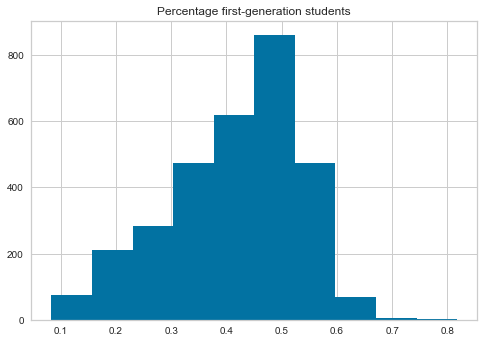

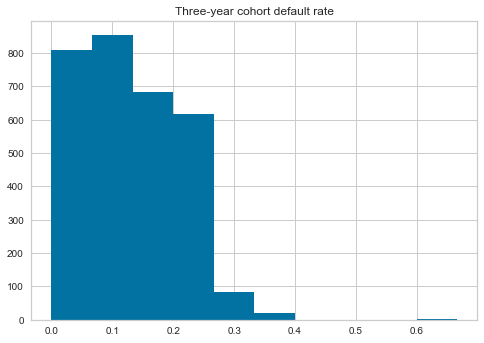

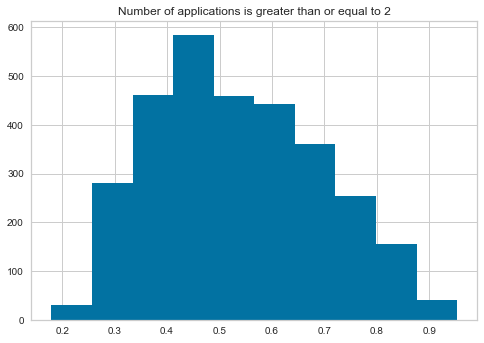

In [9]:
for col in ['PAR_ED_PCT_1STGEN','CDR3','APPL_SCH_PCT_GE2']:
    df_coll_f[col].hist()
    plt.title(list(df_data_dict.loc[(df_data_dict['VARIABLE NAME'] == col),['NAME OF DATA ELEMENT']].iloc[0])[0])
    plt.show()

In [10]:
df_coll_f = u.create_new_features(df_coll_f)
df_coll_f.columns.values

array(['APPL_SCH_PCT_GE2', 'APPL_SCH_PCT_GE3', 'APPL_SCH_PCT_GE4',
       'APPL_SCH_PCT_GE5', 'CDR3', 'DEBT_MDN', 'DEBT_MDN_SUPP',
       'GRAD_DEBT_MDN10YR_SUPP', 'GRAD_DEBT_MDN_SUPP', 'INSTNM', 'OPEID',
       'PAR_ED_PCT_1STGEN', 'PAR_ED_PCT_HS', 'PAR_ED_PCT_MS',
       'PAR_ED_PCT_PS', 'PCIP01', 'PCIP03', 'PCIP04', 'PCIP05', 'PCIP09',
       'PCIP10', 'PCIP11', 'PCIP12', 'PCIP13', 'PCIP14', 'PCIP15',
       'PCIP16', 'PCIP19', 'PCIP22', 'PCIP23', 'PCIP24', 'PCIP25',
       'PCIP26', 'PCIP27', 'PCIP29', 'PCIP30', 'PCIP31', 'PCIP38',
       'PCIP39', 'PCIP40', 'PCIP41', 'PCIP42', 'PCIP43', 'PCIP44',
       'PCIP45', 'PCIP46', 'PCIP47', 'PCIP48', 'PCIP49', 'PCIP50',
       'PCIP51', 'PCIP52', 'PCIP54', 'PCTFLOAN', 'PCTPELL', 'PPTUG_EF',
       'PREDDEG', 'UG25abv', 'UGDS_2MOR', 'UGDS_AIAN', 'UGDS_ASIAN',
       'UGDS_BLACK', 'UGDS_HISP', 'UGDS_NHPI', 'UGDS_NRA', 'UGDS_UNKN',
       'UGDS_WHITE', 'UNITID', 'opeid6', 'PCIP01PAR_ED_PCT_1STGEN',
       'PCIP03PAR_ED_PCT_1STGEN', 'PCIP04PA

## 6. Modeling

<p>Modeling is challenging because it depends on the distribution of the underlying data.  K-Means works best with similarly dense and sized spherical shapes.  DBScan requires dense clusters that have low-density boundaries.  Gaussian Mixture Model requires ellipsoidal data.  With upwards of 60 data elements, there was no way to get a sense for the type of distribution that the college data set has.</p>

#### Scaling
<p>I began the exercise by scaling the data to make it usable by the algorithms.</p>

#### K-Means
<p>Next I tried modeling both K-Means and DBScan.  To determine the proper number of clusters to use with the K-Means algorithm, I used each of inertia, silhouette, and calinski_harabasz.  And this is where I learned that either the clusters were not well defined or the K-Means was not the correct algorithm to use.  With the inertia metric I did not find a well-defined elbow, though the slope leveled out somewhere between 7 and 10 clusters.  Next I tried the silhouette metric and found that while I wanted a score near 1 to show well-defined clusters, I had a score nearer to .12, which is useable but fairly weak interms of clusters.  Finally, I attempted the calinski_harabasz metric and the module told me that the data was not well clustered.</p>

#### DBScan
<p>Next I tried DBScan figuring that perhaps the data did not meet the K-Means criteria.  In particular, perhaps it was just not spherical in nature. For DBScan as I picked my minimum cluster size, I decided that 100 colleges in a group seemed like a reasonable number.  For epsilon I also tried a variety of sizes from .05 to .00005.  Unfortunately, for each epsilon and then for subsequent changes in the cluster size, I always got a -1 for the labels, meaning that the algorithm treated all data like an anomaly.</p>
    
#### Feature Engineering
<p>This was the point in time that I went back and attempted the Feature Engineering, but I found similar results before an after.  However, as I discuss in Section7, the K-Means alogorithm appeared to do a reasonable job of dividing the 3,000 colleges into 6 groups that were clearly distinct and meaningful.

#### Scale Data

In [11]:
scaler = StandardScaler()

In [12]:
l_non_numeric_cols = ['INSTNM', 'opeid6', 'UNITID', 'OPEID']
df_coll_f_labels = df_coll_f[l_non_numeric_cols].copy()
df_coll_f.drop((l_non_numeric_cols),axis=1,inplace=True)
df_coll_f_scaled = u.scale_data(df_coll_f,scaler)

#### K-Means

In [13]:
model = KMeans(random_state=2020)

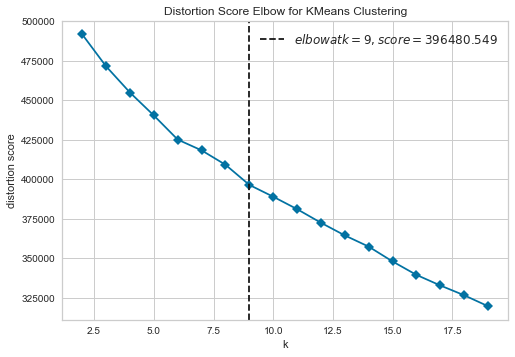

In [14]:
u.show_num_elbow_clusters(df_coll_f_scaled,model,'distortion')

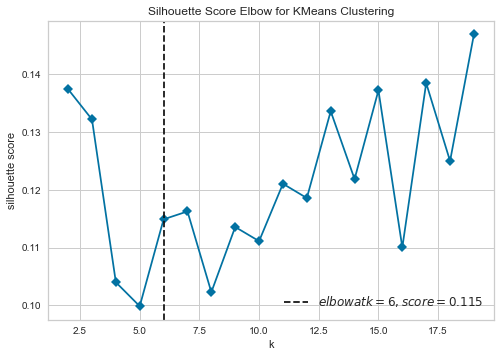

In [15]:
u.show_num_elbow_clusters(df_coll_f_scaled,model,'silhouette')

C:\Users\barker.FRENCH\AppData\Local\Continuum\anaconda3\lib\site-packages\yellowbrick\utils\kneed.py:182: YellowbrickWarning: No "knee" or "elbow point" detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
C:\Users\barker.FRENCH\AppData\Local\Continuum\anaconda3\lib\site-packages\yellowbrick\utils\kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
C:\Users\barker.FRENCH\AppData\Local\Continuum\anaconda3\lib\site-packages\yellowbrick\cluster\elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


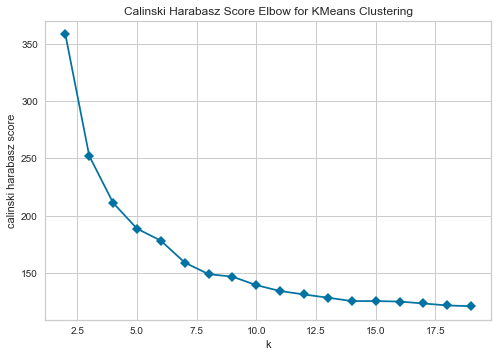

In [16]:
u.show_num_elbow_clusters(df_coll_f_scaled,model,'calinski_harabasz')

In [17]:
model = KMeans (n_clusters = 6, algorithm='full',random_state=2020)
df_coll_clus = u.find_k_means_clusters(df_coll_f_scaled, df_coll_f_labels,model,scaler)
pd.pivot_table(df_coll_clus,index=['Clusters'],values='INSTNM',aggfunc='count')

,INSTNM
Clusters,
0,643
1,344
2,1020
3,148
4,129
5,783


#### DBScan

In [18]:
for eps_value in (.5*10**(-i) for i in range(1,5)):
    dbscan = DBSCAN(eps=eps_value,min_samples=100)
    print(dbscan.fit(df_coll_f_scaled))
    print(np.unique(dbscan.labels_))
    print('\n')

DBSCAN(eps=0.05, min_samples=100)
[-1]


DBSCAN(eps=0.005, min_samples=100)
[-1]


DBSCAN(eps=0.0005, min_samples=100)
[-1]


DBSCAN(eps=5e-05, min_samples=100)
[-1]




## 7. Model Evaluation and Selection

<p>So before I moved on to trying a different method of modeling, I took a look at the results of K-Means, and I was pleasantly surprised.  The model returned meaningful groups.  First, I reviewed each of the six groups:</p>
<ol><ul>Group 1: Community Colleges</ul>
    <ul>Group 2: Top Tier Colleges</ul>
   <ul> Group 3: 2nd Tier Colleges</ul>
    <ul>Group 4: Technical Colleges</ul>
    <ul>Group 5: Arts Colleges</ul>
    <ul>Group 6: 3rd Tier Colleges</ul></ol>
<p>Next I reviewed the median scores for each of the groups, and they tended to reflect my impression of the groups that were created.  Namely students at the Top Tier Colleges tended to put in more applications and have a lower default rate on debt.  There were higher levels of education for the parents of students in Top Tier Schools vs. 3rd Tier or Community Colleges.</p>

<p>However, the groups lacked some of the ganularity that I sought to offer students making the difficult choice of where to attend college.  For example, with six groups, a high acheiving student desiring a more diverse school would have to wade into the Top Tier and Second Tier Schools to find one that met their needs for a diverse learning environment.  I attempted to extend the groups in K-Means to 20 and then down to 12.  At 30 groups there were several groups with between 1 and 7 membres, which was too small.  At 12 groups, some of the obvious disction between the groups disappeared.  So ultimately, I stuck with what the silhouette metric suggested.

#### Group Exemplars

##### Group 1: Community Colleges

In [19]:
group = list(df_coll_clus.loc[df_coll_clus['Clusters'] == 0,'INSTNM'])
group[0:15]

['Chattahoochee Valley Community College',
 'Enterprise State Community College',
 'James H Faulkner State Community College',
 'George C Wallace State Community College-Hanceville',
 'Jefferson State Community College',
 'John C Calhoun State Community College',
 'Northwest-Shoals Community College',
 'Northeast Alabama Community College',
 'Snead State Community College',
 'University of Alaska Anchorage',
 'University of Alaska Southeast',
 'Central Arizona College',
 'Cochise College',
 'Universal Technical Institute of Arizona Inc',
 'National Park Community College']

##### Group 2: Top Tier Colleges

In [20]:
group = list(df_coll_clus.loc[df_coll_clus['Clusters'] == 1,'INSTNM'])
group[45:60]

['Fairfield University',
 'Trinity College',
 'Wesleyan University',
 'Yale University',
 'American University',
 'Catholic University of America',
 'Gallaudet University',
 'George Washington University',
 'Georgetown University',
 'Eckerd College',
 'University of Florida',
 'University of Miami',
 'Rollins College',
 'Stetson University',
 'Agnes Scott College']

##### Group 3: Second Tier Colleges

In [21]:
group = list(df_coll_clus.loc[df_coll_clus['Clusters'] == 2,'INSTNM'])
group[1:15]

['University of Alabama at Birmingham',
 'University of Alabama in Huntsville',
 'Alabama State University',
 'The University of Alabama',
 'Athens State University',
 'Auburn University at Montgomery',
 'Auburn University',
 'Concordia College Alabama',
 'Huntingdon College',
 'Jacksonville State University',
 'University of West Alabama',
 'Miles College',
 'University of Mobile',
 'University of Montevallo']

##### Group 4: Technical Colleges

In [22]:
group = list(df_coll_clus.loc[df_coll_clus['Clusters'] == 3,'INSTNM'])
group[1:15]

['ITT Technical Institute-Tempe',
 'ITT Technical Institute-Rancho Cordova',
 'Coleman University',
 'ITT Technical Institute-National City',
 'ITT Technical Institute-San Dimas',
 'ITT Technical Institute-Orange',
 'ITT Technical Institute-Tampa',
 'ITT Technical Institute-Boise',
 'ITT Technical Institute-Nashville',
 'ITT Technical Institute-Fort Wayne',
 'ITT Technical Institute-Indianapolis',
 'Sullivan College of Technology and Design',
 'ITI Technical College',
 'ITT Technical Institute-Wyoming']

##### Group 5: Arts Colleges

In [23]:
group = list(df_coll_clus.loc[df_coll_clus['Clusters'] == 4,'INSTNM'])
group[1:15]

['Academy of Art University',
 'American Academy of Dramatic Arts-Los Angeles',
 'Art Center College of Design',
 'Brooks Institute',
 'California College of the Arts',
 'California Institute of the Arts',
 'Cogswell College',
 'Columbia College-Hollywood',
 'Fashion Institute of Design & Merchandising-Los Angeles',
 'Fashion Institute of Design & Merchandising-Orange County',
 'The Art Institute of California-Argosy University San Diego',
 'Laguna College of Art and Design',
 'The Art Institute of California-Argosy University San Francisco',
 'Newschool of Architecture and Design']

In [24]:
group = list(df_coll_clus.loc[df_coll_clus['Clusters'] == 5,'INSTNM'])
group[1:15]

['Faulkner University',
 'Southeastern Bible College',
 'Everest College-Phoenix',
 'College America-Flagstaff',
 'Brown Mackie College-Tucson',
 'Grand Canyon University',
 'Anthem College-Phoenix',
 'University of Phoenix-Phoenix Campus',
 'Western International University',
 'University of Arkansas for Medical Sciences',
 'Central Baptist College',
 'California College San Diego',
 'Charles R Drew University of Medicine and Science',
 'Fashion Institute of Design & Merchandising-San Francisco']

#### Median Statistics for each Group

In [25]:
df_coll_clus.pivot_table(index='Clusters',aggfunc=np.median)

,APPL_SCH_PCT_GE2,APPL_SCH_PCT_GE3,APPL_SCH_PCT_GE4,APPL_SCH_PCT_GE5,CDR3,DEBT_MDN,DEBT_MDN_SUPP,GRAD_DEBT_MDN10YR_SUPP,GRAD_DEBT_MDN_SUPP,OPEID,PAR_ED_PCT_1STGEN,PAR_ED_PCT_HS,PAR_ED_PCT_MS,PAR_ED_PCT_PS,PCIP01,PCIP01APPL_SCH_PCT_GE2,PCIP01CDR3,PCIP01PAR_ED_PCT_1STGEN,PCIP03,PCIP03APPL_SCH_PCT_GE2,PCIP03CDR3,PCIP03PAR_ED_PCT_1STGEN,PCIP04,PCIP04APPL_SCH_PCT_GE2,PCIP04CDR3,PCIP04PAR_ED_PCT_1STGEN,PCIP05,PCIP05APPL_SCH_PCT_GE2,PCIP05CDR3,PCIP05PAR_ED_PCT_1STGEN,PCIP09,PCIP09APPL_SCH_PCT_GE2,PCIP09CDR3,PCIP09PAR_ED_PCT_1STGEN,PCIP10,PCIP10APPL_SCH_PCT_GE2,PCIP10CDR3,PCIP10PAR_ED_PCT_1STGEN,PCIP11,PCIP11APPL_SCH_PCT_GE2,PCIP11CDR3,PCIP11PAR_ED_PCT_1STGEN,PCIP12,PCIP12APPL_SCH_PCT_GE2,PCIP12CDR3,PCIP12PAR_ED_PCT_1STGEN,PCIP13,PCIP13APPL_SCH_PCT_GE2,PCIP13CDR3,PCIP13PAR_ED_PCT_1STGEN,...,PCIP45PAR_ED_PCT_1STGEN,PCIP46,PCIP46APPL_SCH_PCT_GE2,PCIP46CDR3,PCIP46PAR_ED_PCT_1STGEN,PCIP47,PCIP47APPL_SCH_PCT_GE2,PCIP47CDR3,PCIP47PAR_ED_PCT_1STGEN,PCIP48,PCIP48APPL_SCH_PCT_GE2,PCIP48CDR3,PCIP48PAR_ED_PCT_1STGEN,PCIP49,PCIP49APPL_SCH_PCT_GE2,PCIP49CDR3,PCIP49PAR_ED_PCT_1STGEN,PCIP50,PCIP50APPL_SCH_PCT_GE2,PCIP50CDR3,PCIP50PAR_ED_PCT_1STGEN,PCIP51,PCIP51APPL_SCH_PCT_GE2,PCIP51CDR3,PCIP51PAR_ED_PCT_1STGEN,PCIP52,PCIP52APPL_SCH_PCT_GE2,PCIP52CDR3,PCIP52PAR_ED_PCT_1STGEN,PCIP54,PCIP54APPL_SCH_PCT_GE2,PCIP54CDR3,PCIP54PAR_ED_PCT_1STGEN,PCTFLOAN,PCTPELL,PPTUG_EF,PREDDEG,UG25abv,UGDS_2MOR,UGDS_AIAN,UGDS_ASIAN,UGDS_BLACK,UGDS_HISP,UGDS_NHPI,UGDS_NRA,UGDS_UNKN,UGDS_WHITE,UNITID,key_0,opeid6
Clusters,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.432432,0.219539,0.133366,0.086640,0.178,6812.0,6812.0,118.791935,10700.0,367100.0,0.485700,0.430233,0.043975,0.514300,0.0,0.0,0.0,0.0,0.0000,0.000000,5.421011e-20,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.00000,-1.734723e-18,0.000000,-8.673617e-19,0.0,0.0,0.0,0.0,0.02220,0.009378,0.003990,0.010875,0.0,0.0,0.0,0.0,0.0090,0.003848,0.001260,0.004551,...,0.000000,0.0,0.0,0.0,0.0,0.0166,0.007028,0.002613,0.008292,0.0012,0.000586,0.000076,0.000588,0.0,0.0,0.0,0.0,0.0073,3.049653e-03,1.224500e-03,0.003496,0.2030,0.083514,0.034375,0.098169,0.0947,0.038658,0.016211,0.045742,0.00000,0.000000,0.000000,0.000000,0.25710,0.4173,0.48620,2.0,0.34470,0.02180,0.0052,0.01570,0.08720,0.07700,0.0014,0.00460,0.02530,0.62870,187046.0,1246.0,3671.0
1,0.766428,0.643986,0.558060,0.468715,0.038,19633.5,19633.5,277.551250,25000.0,262200.0,0.225202,0.209675,0.014692,0.774798,0.0,0.0,0.0,0.0,0.0078,0.006126,2.224000e-04,0.001815,0.0,0.0,0.0,0.0,0.00565,0.004379,0.000179,0.001394,0.03685,2.874672e-02,0.001278,9.311929e-03,0.0,0.0,0.0,0.0,0.01325,0.009801,0.000425,0.002910,0.0,0.0,0.0,0.0,0.0075,0.005500,0.000238,0.001558,...,0.032164,0.0,0.0,0.0,0.0,0.0000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0514,3.890971e-02,1.921100e-03,0.011663,0.0076,0.005330,0.000275,0.002029,0.1174,0.092244,0.004396,0.030024,0.03405,0.025478,0.001146,0.007465,0.54625,0.2392,0.02475,3.0,0.03885,0.03065,0.0022,0.04580,0.05160,0.07745,0.0007,0.03815,0.03225,0.64410,184733.5,1219.5,2622.0
2,0.628383,0.396870,0.273806,0.190759,0.077,16813.5,16813.5,277.551250,25000.0,278360.0,0.366388,0.340907,0.021556,0.633612,0.0,0.0,0.0,0.0,0.0000,0.000000,5.421011e-20,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.03480,2.113599e-02,0.002481,1.227838e-02,0.0,0.0,0.0,0.0,0.01310,0.007769,0.000891,0.004351,0.0,0.0,0.0,0.0,0.0855,0.049413,0.006093,0.028338,...,0.011750,0.0,0.0,0.0,0.0,0.0000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0307,1.813502e-02,2.342700e-03,0.010953,0.0905,0.053823,0.006244,0.030694,0.1807,0.112660,0.014583,0.064102,0.01375,0.008577,0.000980,0.004682,0.63105,0.3881,0.12470,3.0,0.19170,0.02155,0.0035,0.01465,0.08185,0.05175,0.0011,0.01870,0.02630,0.67230,186601.0,1241.5,2783.5
3,0.306575,0.119833,0.062752,0.036414,0.224,14656.5,14656.5,286.804809,25833.5,732983.5,0.506675,0.455015,0.051660,0.4933

## Conclusions
<p>Despite the silhouette score of 11.5, the K-Means algorithm did a reasonable job of grouping colleges together in a meaningful way.  More data elements containing distinguishing values are necessary to divide the groups further and to find more helpful subsets of the six groups above.  That DBScan was unsuccessful while K-Means worked suggests to me that the data are closely clustered with some significant overlap that prevents DBScan from defining groups.</p>

<p>If I were to pick up this data set and attempt this project again, I would take second look at the data elements that were dropped due to null values.  For example could certain data elements relate more to one set of groups than a different set of groups (e.g. [Top-Tier,Second-Tier] vs. [Arts Colleges, Technical Colleges]).  Could the clustering models be employed with different data elements against these different sets of groups and derive more meaning?  The result would be a tool for students seeking the traditional college education and a tool for those interested in Trade Skills or Art.</p>